# Power Transformer 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.describe()    #No negative value but exit x value

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
x = df.drop(columns=['Strength'])
y = df['Strength']

## Apply linear regression

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
clf = LinearRegression()

In [13]:
clf.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = clf.predict(x_test)

In [15]:
r2_score(y_pred, y_test)

0.4231704797890976

## cross validation

In [16]:
lr = LinearRegression()
np.mean(cross_val_score(lr, x, y, scoring='r2'))

np.float64(0.46099404916628606)

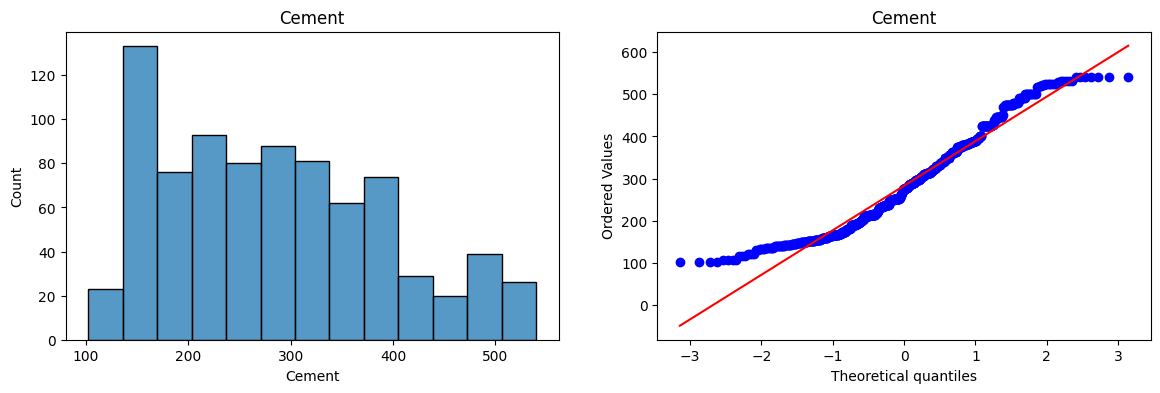

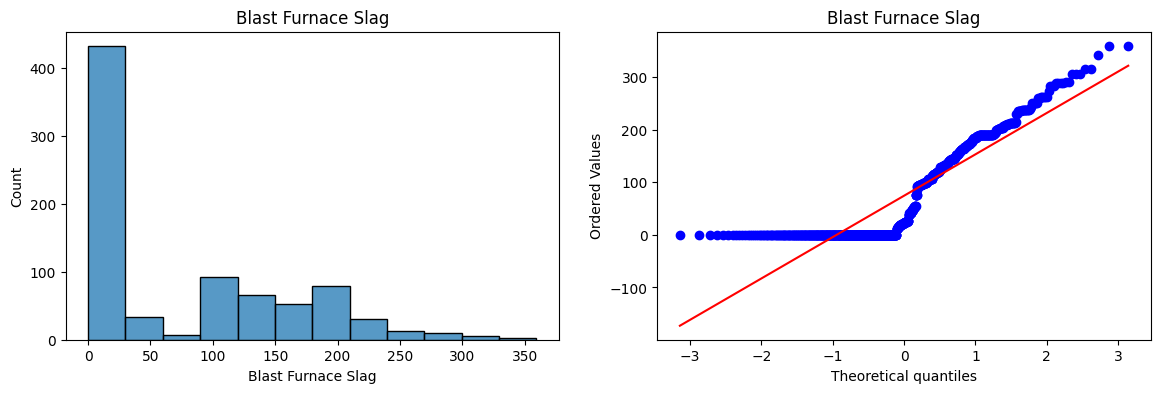

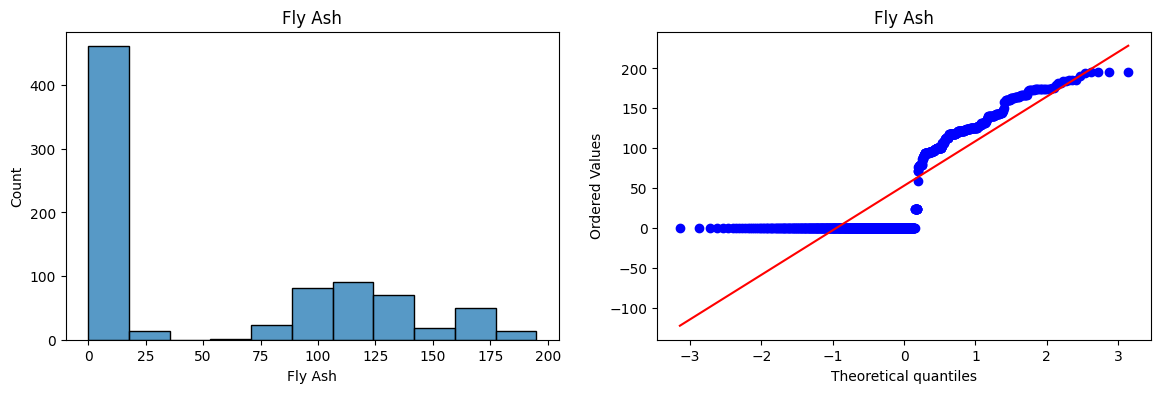

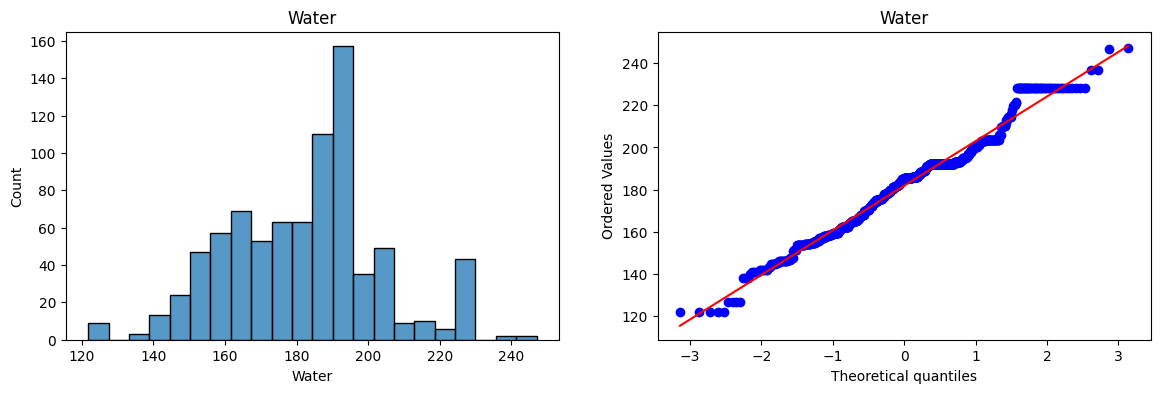

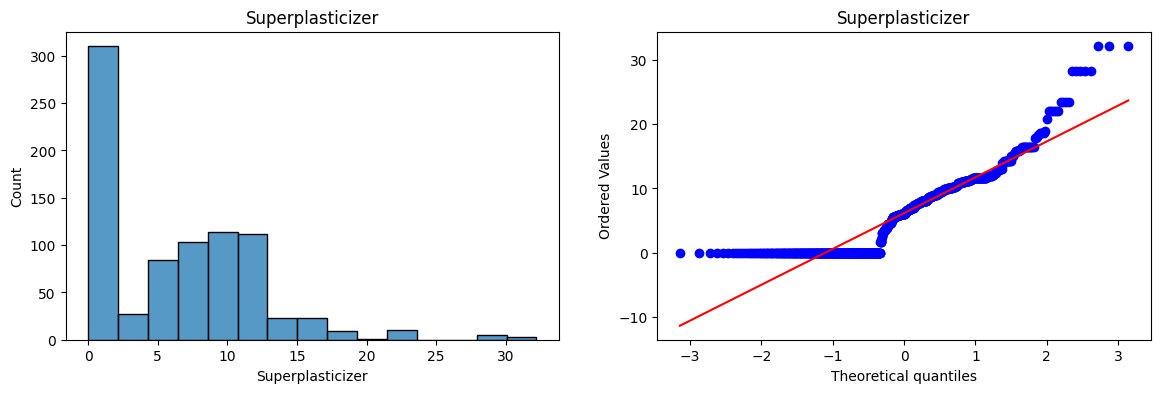

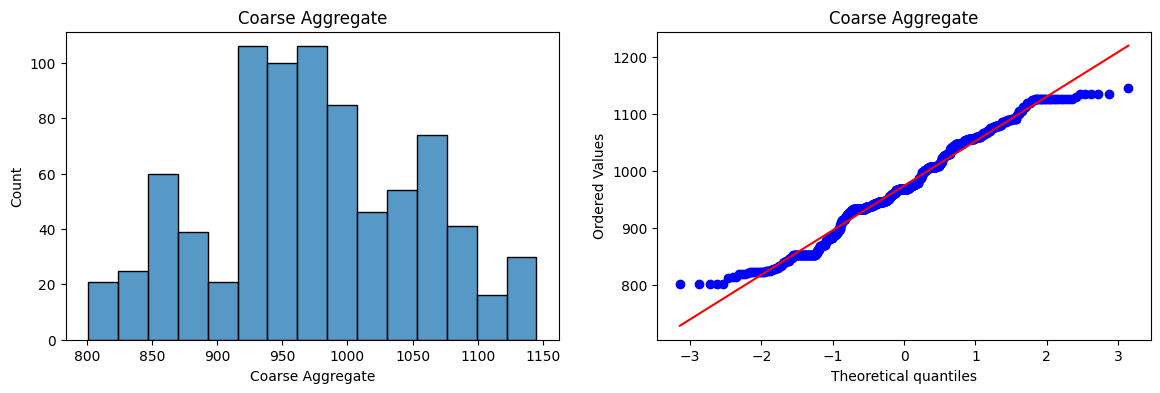

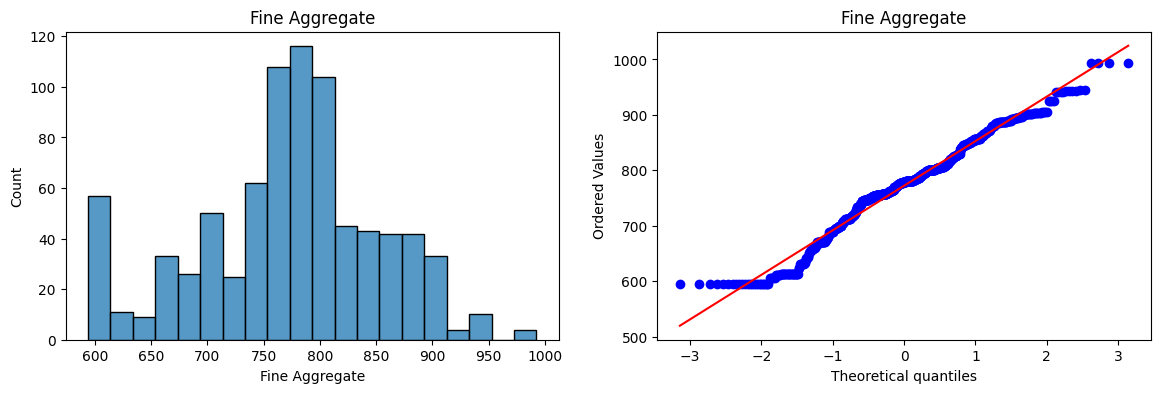

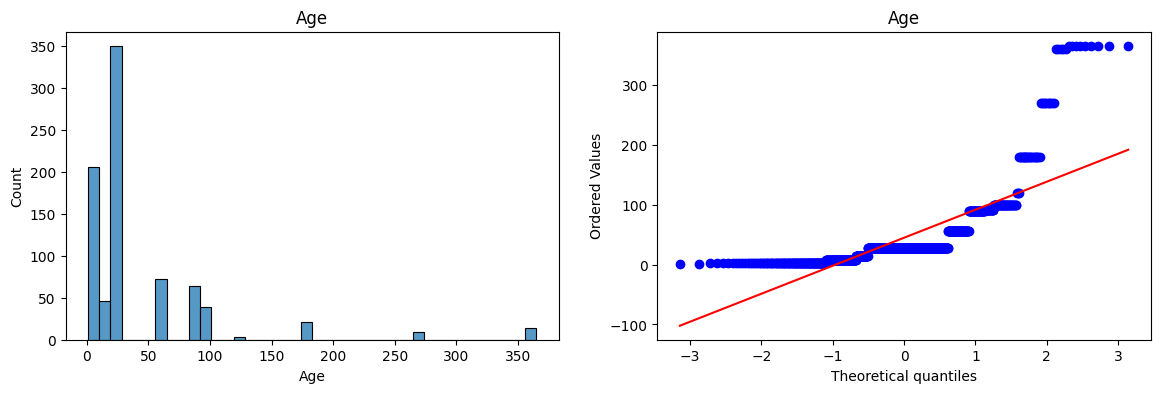

In [20]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [34]:
pt = PowerTransformer(method='box-cox')
x_transformed = pt.fit_transform(x+0.0000001)
#x_test_transformed = pt.fit_transform(x_test+0.0000001)
pd.DataFrame({'cols':x.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.172271
1,Blast Furnace Slag,0.022924
2,Fly Ash,-0.028797
3,Water,0.809568
4,Superplasticizer,0.087911
5,Coarse Aggregate,1.129167
6,Fine Aggregate,1.829625
7,Age,0.048975


In [35]:
#Apply linear regression directy cross validation apply
lr = LinearRegression()
np.mean(cross_val_score(lr, x_transformed, y, scoring='r2'))

np.float64(0.6658537926845631)

In [36]:
pt = PowerTransformer()    #default takes johnson
x_transformed = pt.fit_transform(x+0.0000001)
#x_test_transformed = pt.fit_transform(x_test+0.0000001)
pd.DataFrame({'cols':x.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.169544
1,Blast Furnace Slag,0.016633
2,Fly Ash,-0.136480
3,Water,0.808438
4,Superplasticizer,0.264160
5,Coarse Aggregate,1.129395
6,Fine Aggregate,1.830764
7,Age,0.001771


In [37]:
#Apply linear regression directy cross validation apply
lr = LinearRegression()
np.mean(cross_val_score(lr, x_transformed, y, scoring='r2'))

np.float64(0.6834625156970937)